In [1]:
pip install yfinance prophet pandas matplotlib scikit-learn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     -------------------- ---------------- 532.5/949.2 kB 11.1 MB/s eta 0:00:01
     ------------------------------------  942.1/949.2 kB 11.9 MB/s eta 0:00:01
     ------------------------------------  942.1/949.2 kB 11.9 MB/s eta 0:00:01
     -------------------------------------- 949.2/949.2 kB 6.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing me

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\T-GAMER\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\prophet\\stan_model\\cmdstan-2.33.1\\stan\\lib\\stan_math\\lib\\tbb_2020.3\\include\\tbb\\internal\\_deprecated_header_message_guard.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\T-GAMER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_5992\1804005291.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ibov = yf.download("^BVSP", start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


22:17:07 - cmdstanpy - INFO - Chain [1] start processing
22:17:08 - cmdstanpy - INFO - Chain [1] done processing


Acurácia: 52.88%


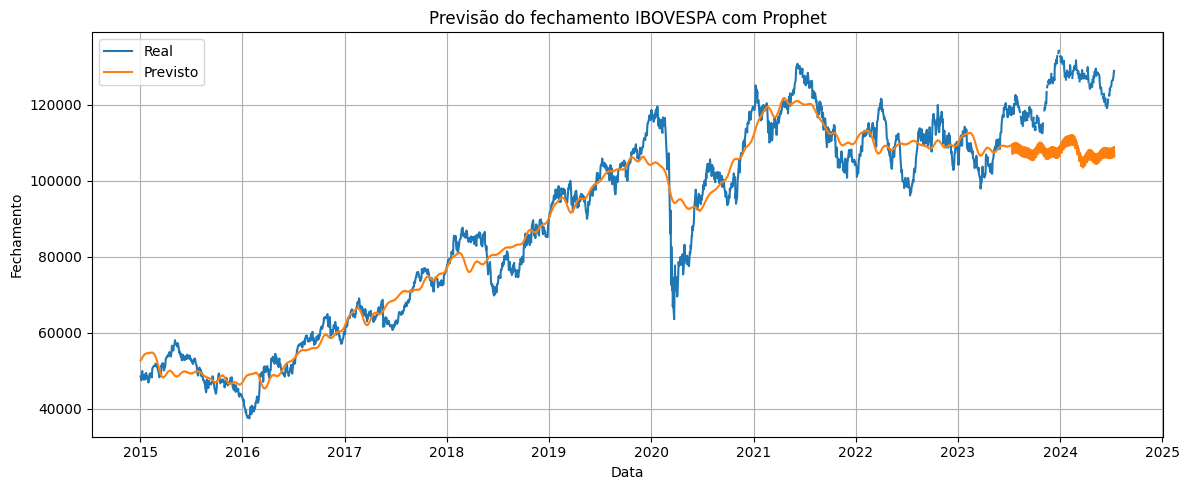

In [8]:
import yfinance as yf
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# 1. Baixar dados do IBOVESPA
ibov = yf.download("^BVSP", start="2015-01-01", end="2024-12-31")
df = ibov.reset_index()[["Date", "Close"]].copy()
df.columns = ["ds", "y"]
df["ds"] = pd.to_datetime(df["ds"])
df["y"] = df["y"].astype(float)

# 2. Separar treino
train = df[:-365]

# 3. Treinar Prophet
model = Prophet(daily_seasonality=False)
model.fit(train)

# 4. Prever próximos 365 dias
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# 5. Adicionar valor real (fechamento verdadeiro)
df_forecast = forecast[["ds", "yhat"]].copy()
df_forecast = df_forecast.merge(df[["ds", "y"]], on="ds", how="left")
df_forecast.rename(columns={"y": "real"}, inplace=True)

# 🔍 Verificar se real foi preenchido corretamente
if df_forecast["real"].isna().all():
    raise ValueError("Coluna 'real' está toda vazia. Verifique se as datas batem com o dataframe original.")

# 6. Criar labels: subiu (1) ou caiu (0)
df_forecast["real_shift"] = df_forecast["real"].shift(-1)
df_forecast["target"] = (df_forecast["real_shift"] > df_forecast["real"]).astype(int)

df_forecast["yhat_shift"] = df_forecast["yhat"].shift(-1)
df_forecast["pred"] = (df_forecast["yhat_shift"] > df_forecast["yhat"]).astype(int)

# 7. Limpar NaNs
df_final = df_forecast.dropna(subset=["target", "pred"])

# 8. Avaliar acurácia
acuracia = accuracy_score(df_final["target"], df_final["pred"])
print(f"Acurácia: {acuracia:.2%}")

# 9. Plotar gráfico real vs previsto
plt.figure(figsize=(12, 5))
plt.plot(df_final["ds"], df_final["real"], label="Real")
plt.plot(df_final["ds"], df_final["yhat"], label="Previsto")
plt.title("Previsão do fechamento IBOVESPA com Prophet")
plt.xlabel("Data")
plt.ylabel("Fechamento")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_4172\2856463450.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ibov = yf.download("^BVSP", start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


22:07:16 - cmdstanpy - INFO - Chain [1] start processing
22:07:17 - cmdstanpy - INFO - Chain [1] done processing


           ds     real          yhat direcao_real direcao_prevista acertou
0  2015-01-02  48512.0  52748.145143        Queda             Alta     Não
1  2015-01-05  47517.0  53049.203733         Alta             Alta     Sim
2  2015-01-06  48001.0  53143.994318         Alta             Alta     Sim
3  2015-01-07  49463.0  53298.000619         Alta             Alta     Sim
4  2015-01-08  49943.0  53438.517192        Queda             Alta     Não
5  2015-01-09  48840.0  53627.908550        Queda             Alta     Não
6  2015-01-12  48140.0  53893.547307        Queda             Alta     Não
7  2015-01-13  48042.0  53959.122010        Queda             Alta     Não
8  2015-01-14  47646.0  54076.542934         Alta             Alta     Sim
9  2015-01-15  48026.0  54174.117638         Alta             Alta     Sim
10 2015-01-16  49017.0  54315.328959        Queda             Alta     Não
11 2015-01-19  47758.0  54417.144354         Alta             Alta     Sim
12 2015-01-20  47877.0  5

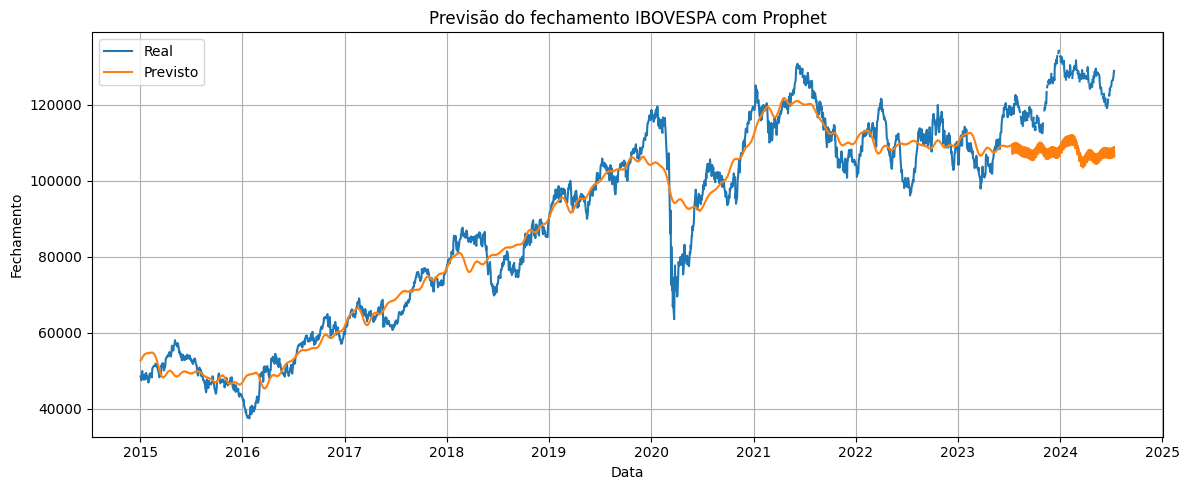

In [2]:
import yfinance as yf
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# 1. Baixar dados do IBOVESPA
ibov = yf.download("^BVSP", start="2015-01-01", end="2024-12-31")
df = ibov.reset_index()[["Date", "Close"]].copy()
df.columns = ["ds", "y"]
df["ds"] = pd.to_datetime(df["ds"])
df["y"] = df["y"].astype(float)

# 2. Separar treino
train = df[:-365]

# 3. Treinar Prophet
model = Prophet(daily_seasonality=False)
model.fit(train)

# 4. Prever próximos 365 dias
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# 5. Adicionar valor real (fechamento verdadeiro)
df_forecast = forecast[["ds", "yhat"]].copy()
df_forecast = df_forecast.merge(df[["ds", "y"]], on="ds", how="left")
df_forecast.rename(columns={"y": "real"}, inplace=True)

# 🔍 Verificar se real foi preenchido corretamente
if df_forecast["real"].isna().all():
    raise ValueError("Coluna 'real' está toda vazia. Verifique se as datas batem com o dataframe original.")

# 6. Criar labels: subiu (1) ou caiu (0)
df_forecast["real_shift"] = df_forecast["real"].shift(-1)
df_forecast["target"] = (df_forecast["real_shift"] > df_forecast["real"]).astype(int)

df_forecast["yhat_shift"] = df_forecast["yhat"].shift(-1)
df_forecast["pred"] = (df_forecast["yhat_shift"] > df_forecast["yhat"]).astype(int)

# 7. Limpar NaNs
df_final = df_forecast.dropna(subset=["target", "pred"])

# Criar coluna com resultado textual
df_final["direcao_real"] = df_final["target"].map({1: "Alta", 0: "Queda"})
df_final["direcao_prevista"] = df_final["pred"].map({1: "Alta", 0: "Queda"})
df_final["acertou"] = (df_final["target"] == df_final["pred"]).map({True: "Sim", False: "Não"})

# Visualizar últimos 15 dias
df_final[["ds", "real", "yhat", "direcao_real", "direcao_prevista", "acertou"]].tail(15)

df_diario = df_final[["ds", "real", "yhat", "direcao_real", "direcao_prevista", "acertou"]].copy()
print(df_diario.head(30))  # mostra os primeiros 30 dias, por exemplo

# 8. Avaliar acurácia
acuracia = accuracy_score(df_final["target"], df_final["pred"])
print(f"Acurácia: {acuracia:.2%}")

# # 9. Plotar gráfico real vs previsto
plt.figure(figsize=(12, 5))
plt.plot(df_final["ds"], df_final["real"], label="Real")
plt.plot(df_final["ds"], df_final["yhat"], label="Previsto")
plt.title("Previsão do fechamento IBOVESPA com Prophet")
plt.xlabel("Data")
plt.ylabel("Fechamento")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()